# Importing important library and loading the data in jupyter notebook

In [1]:
#importing important libraries  
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
# import ydata_profiling as pp


In [2]:
#import file form device
df = pd.read_excel("C:/Users/Vivek negi/OneDrive/Desktop/HR_Data.xlsx")

In [3]:
# using .head() function to know how data distributed
df.head()

,Candidate Ref,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
0,2110407,Yes,14.0,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2112635,No,18.0,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,2112838,No,3.0,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,2115021,No,26.0,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,2115125,Yes,1.0,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


In [4]:
# using .info() and describe function to get information about data
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12333 entries, 0 to 12332
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Candidate Ref                12333 non-null  int64  
 1   DOJ Extended                 12333 non-null  object 
 2   Duration to accept offer     9614 non-null   float64
 3   Notice period                12333 non-null  object 
 4   Offered band                 12333 non-null  object 
 5   Pecent hike expected in CTC  11586 non-null  float64
 6   Percent hike offered in CTC  11737 non-null  float64
 7   Percent difference CTC       11482 non-null  float64
 8   Joining Bonus                12333 non-null  object 
 9   Candidate relocate actual    12333 non-null  object 
 10  Gender                       12333 non-null  object 
 11  Candidate Source             12333 non-null  object 
 12  Rex in Yrs                   12333 non-null  int64  
 13  LOB             

,Candidate Ref,Duration to accept offer,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Rex in Yrs,Age
count,1.233300e+04,9614.000000,11586.000000,11737.000000,11482.000000,12333.000000,12333.000000
mean,2.872888e+06,21.189619,41.837663,37.772016,-2.078916,4.160788,30.232304
std,5.099726e+05,26.410351,29.435844,35.593317,19.997159,2.810108,4.178853
min,2.109586e+06,-228.000000,-68.830000,-60.530000,-68.950000,0.000000,19.000000
25%,2.378256e+06,2.000000,25.000000,20.000000,-9.090000,3.000000,27.000000
50%,2.820675e+06,9.000000,38.890000,34.480000,0.000000,4.000000,30.000000
75%,3.338197e+06,32.000000,52.170000,47.060000,0.000000,6.000000,34.000000
max,3.836076e+06,224.000000,359.770000,471.430000,300.000000,26.000000,64.000000


# Data cleaning part and performing EDA part

In [5]:
# pp.ProfileReport(df)

In [6]:
# finding a unique values in data set, as we see in info notice period dtype is object whereas in data it has numerical values and it is unsupported 
print('notice period =',df['Notice period'].unique())

notice period = [30 45 120 0 ' ' 60 75 90]


In [7]:
# replacing missing value
df['Notice period'].replace(to_replace=' ', value=0, inplace = True)

In [8]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

C:\Users\Vivek negi\AppData\Local\Temp\ipykernel_13912\3784545759.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,Candidate Ref,Duration to accept offer,Notice period,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Rex in Yrs,Age
Candidate Ref,1.000000,-0.026692,-0.221272,0.010554,0.003662,0.008575,-0.125276,0.355756
Duration to accept offer,-0.026692,1.000000,0.326234,0.018304,0.009044,-0.007847,0.095212,0.010302
Notice period,-0.221272,0.326234,1.000000,0.047127,-0.005151,-0.061403,0.270133,-0.071562
Pecent hike expected in CTC,0.010554,0.018304,0.047127,1.000000,0.651497,-0.177674,-0.165577,-0.168325
Percent hike offered in CTC,0.003662,0.009044,-0.005151,0.651497,1.000000,0.603027,-0.102241,-0.099320
Percent difference CTC,0.008575,-0.007847,-0.061403,-0.177674,0.603027,1.000000,0.026684,0.044472
Rex in Yrs,-0.125276,0.095212,0.270133,-0.165577,-0.102241,0.026684,1.000000,0.481631
Age,0.355756,0.010302,-0.071562,-0.168325,-0.099320,0.044472,0.481631,1.000000


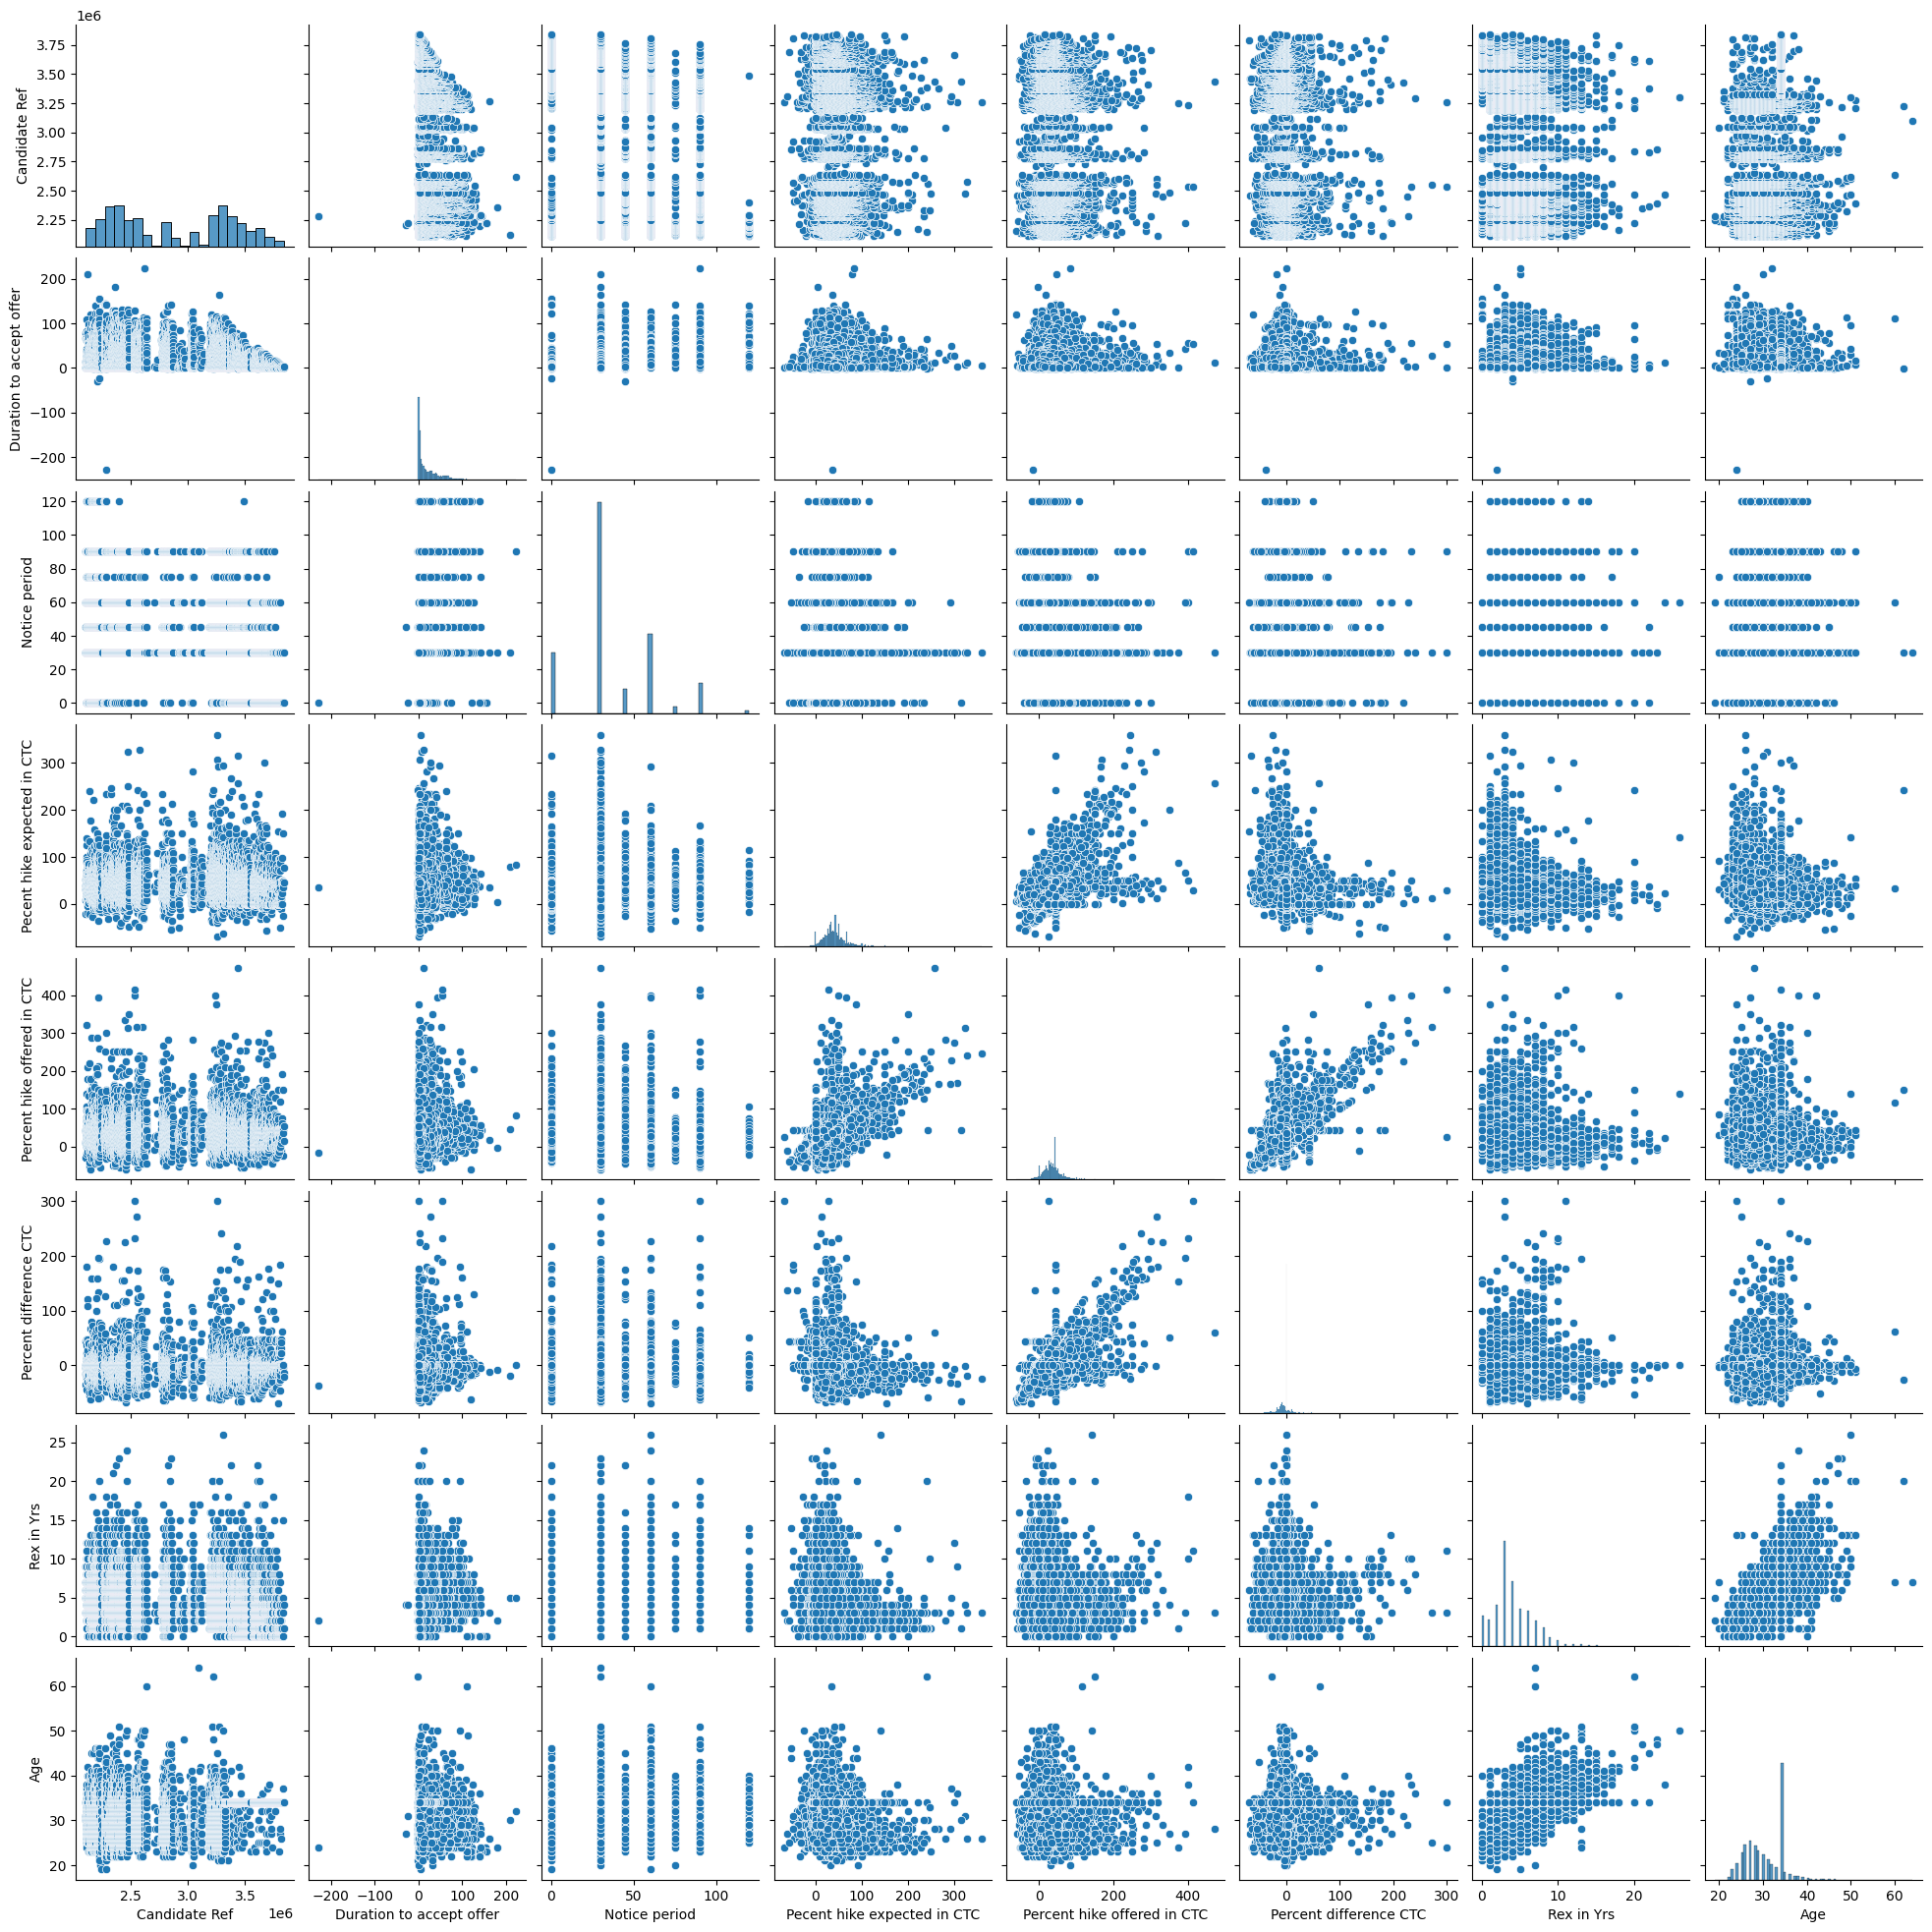

In [9]:
sns.pairplot(df)

In [10]:
# filling null values in data
column = ['Duration to accept offer','Pecent hike expected in CTC','Percent hike offered in CTC','Percent difference CTC']
for i in column: df[i].fillna(df[i].mean(),inplace = True)

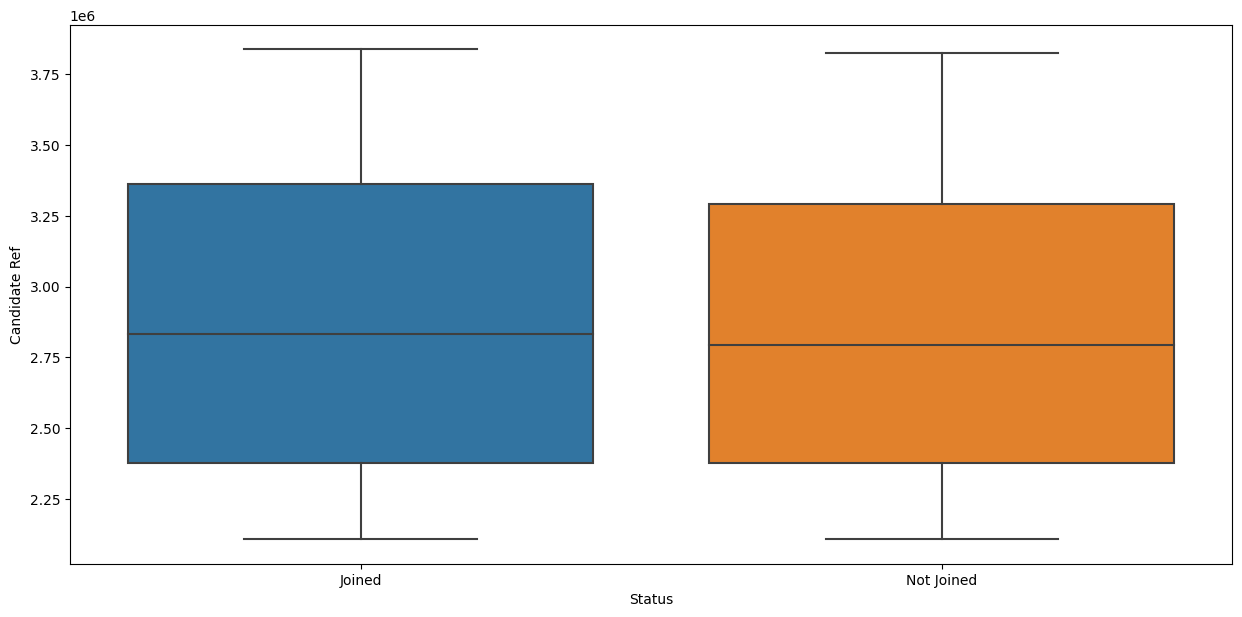

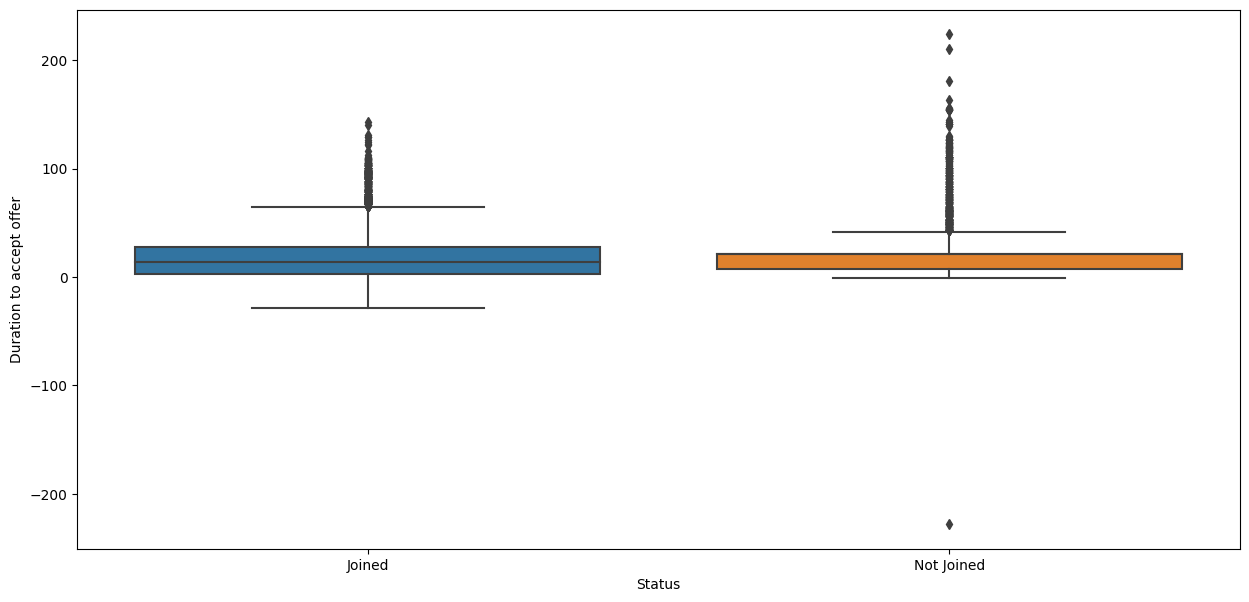

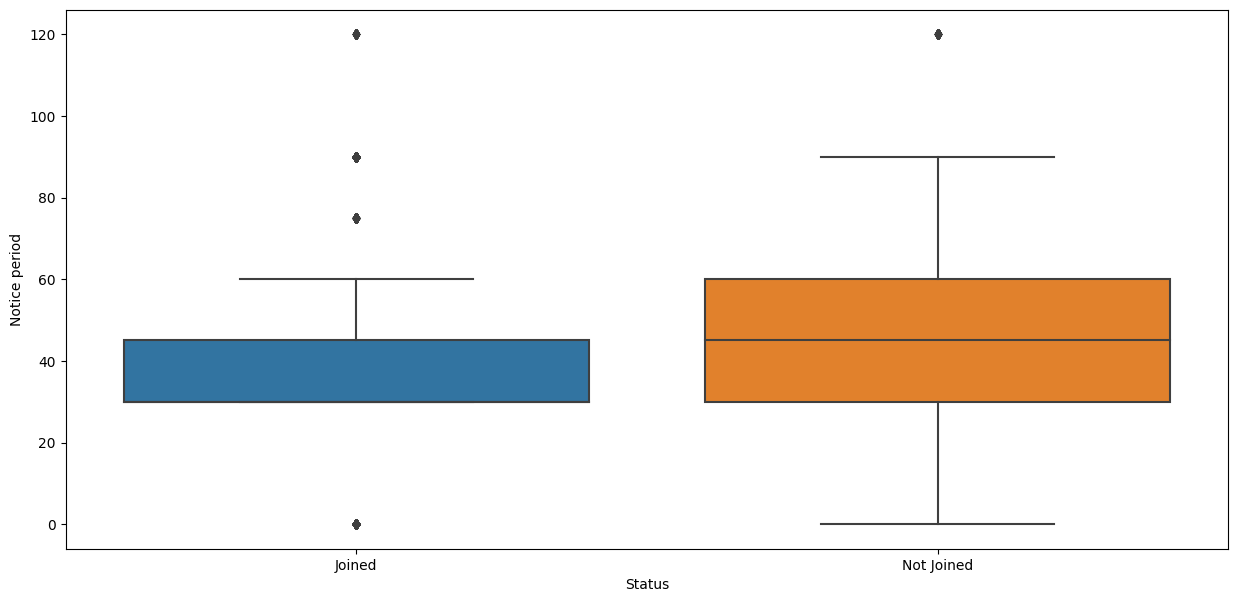

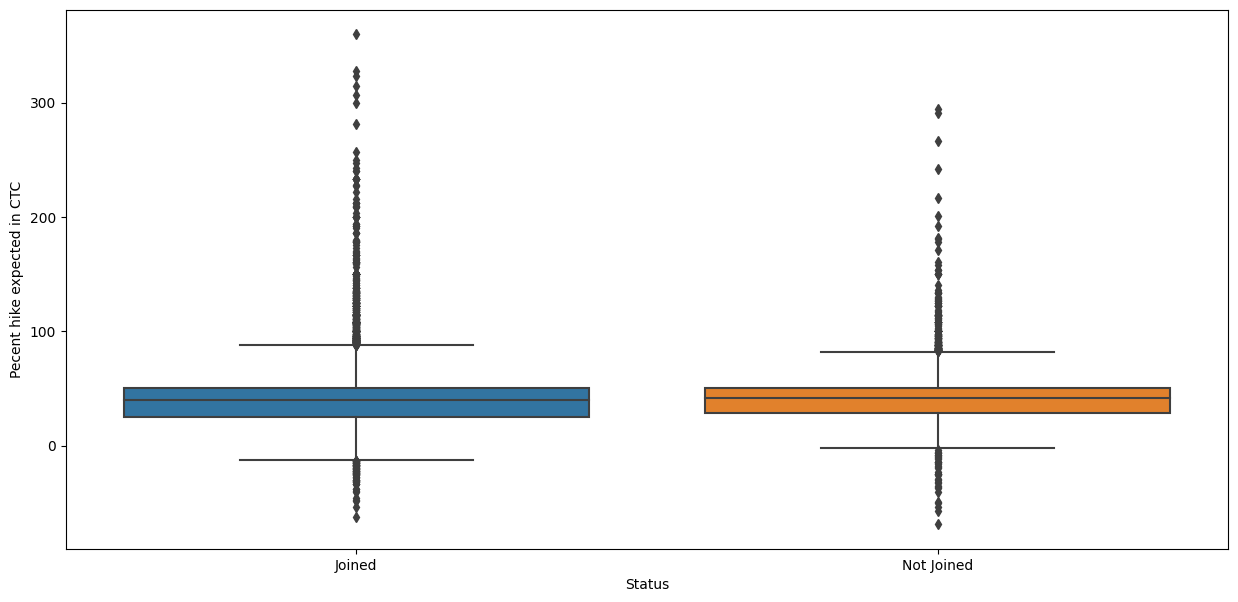

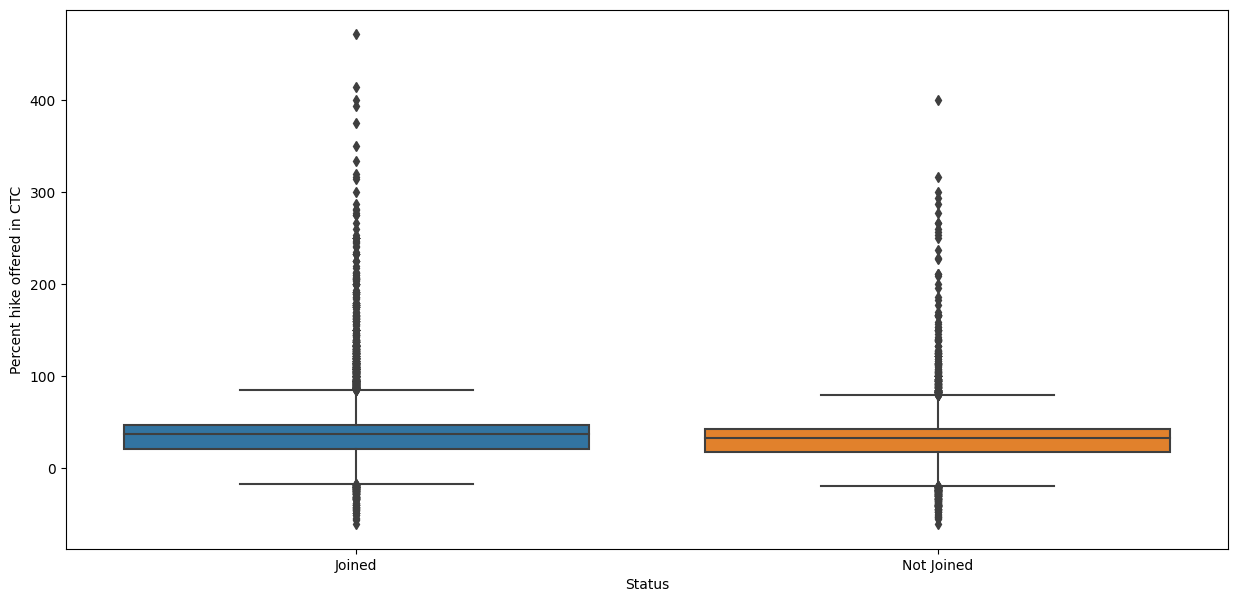

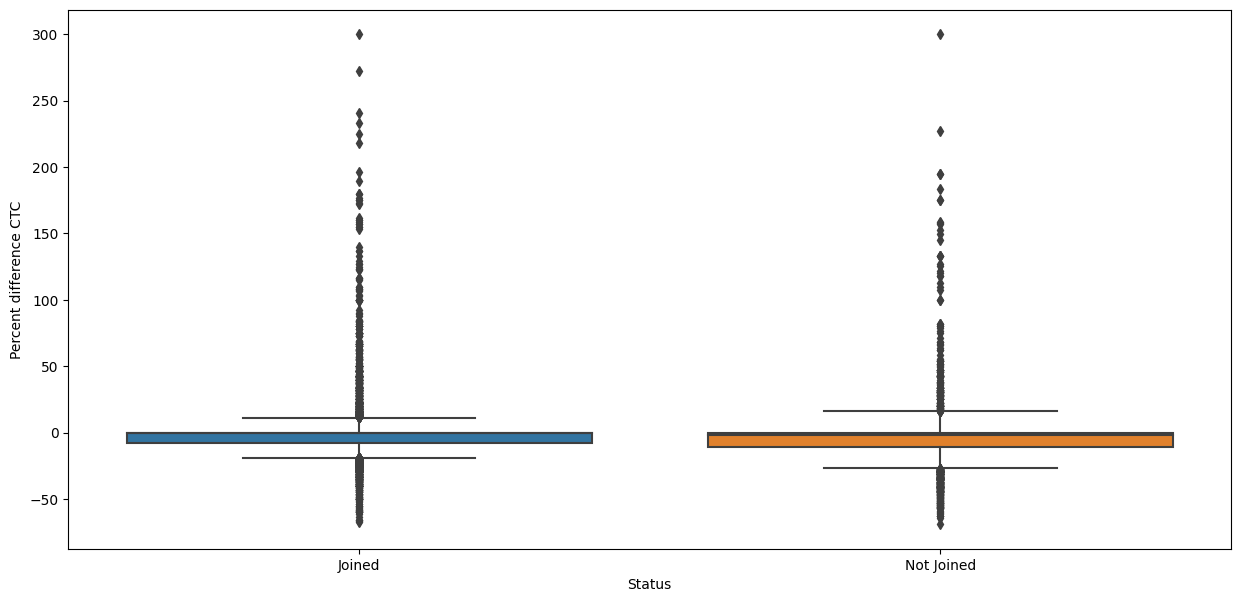

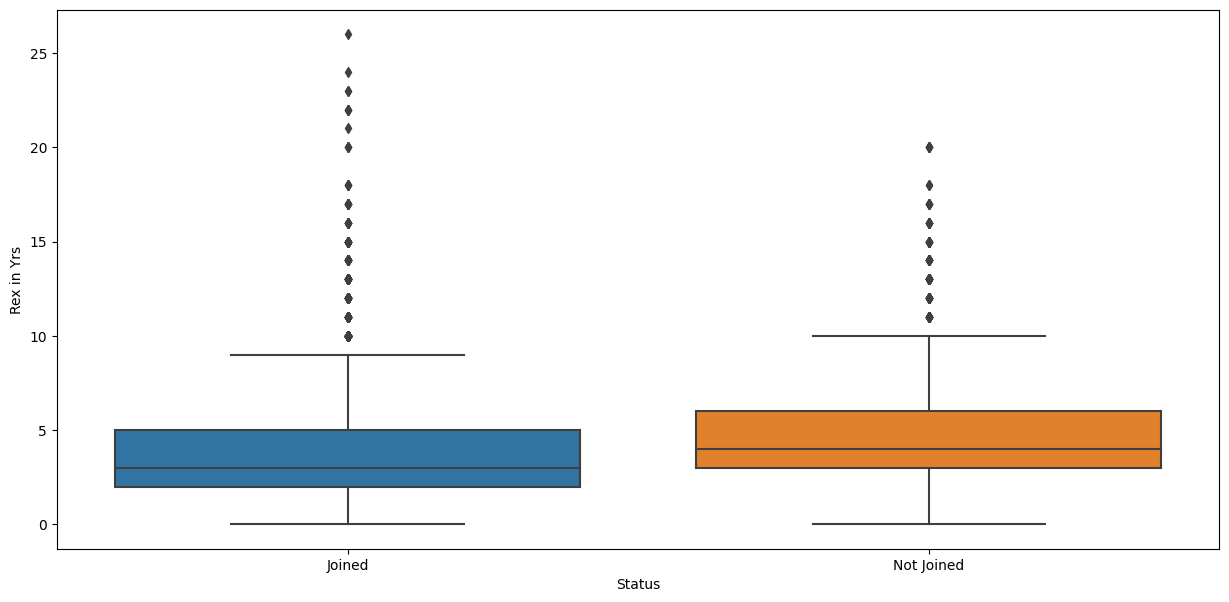

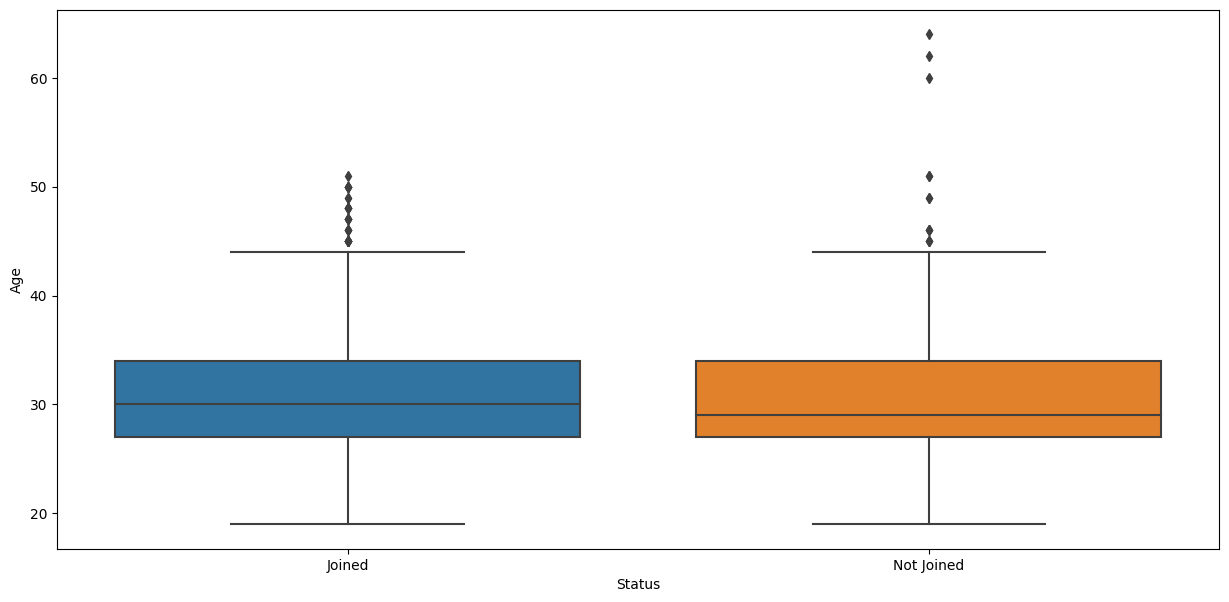

In [11]:
# now for outlier detection 
plt_column = ['Candidate Ref', 'Duration to accept offer',
       'Notice period', 'Pecent hike expected in CTC',
       'Percent hike offered in CTC', 'Percent difference CTC', 'Rex in Yrs', 'Age']
for i in plt_column:
    plt.subplots(figsize = (15,7))
    sns.boxplot(x = 'Status', y = i , data=df)
    

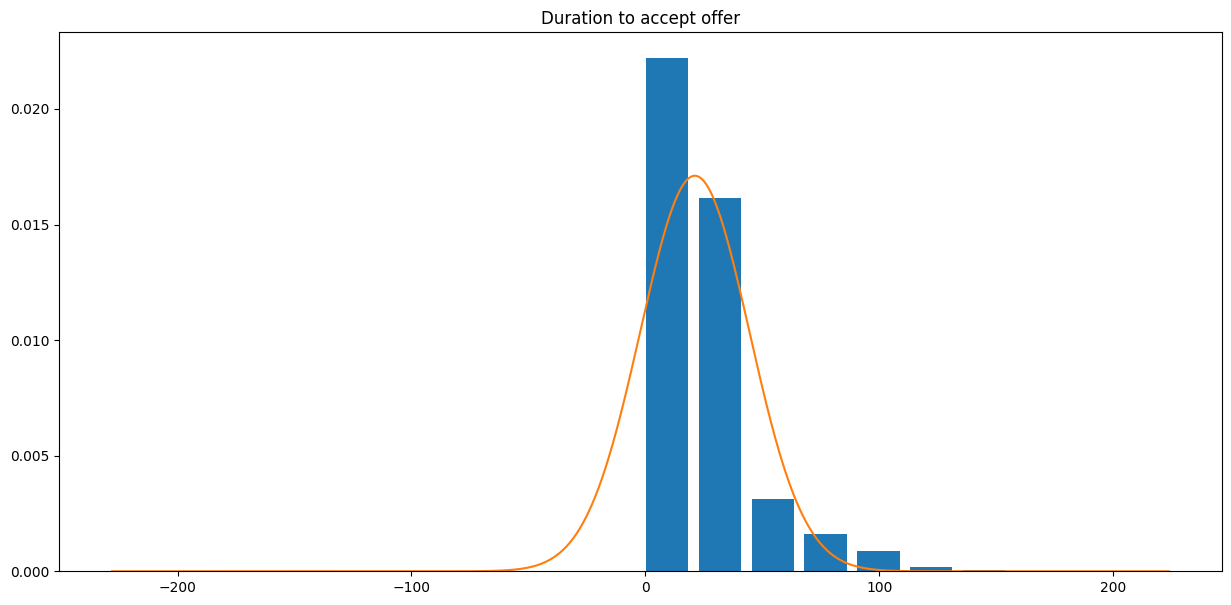

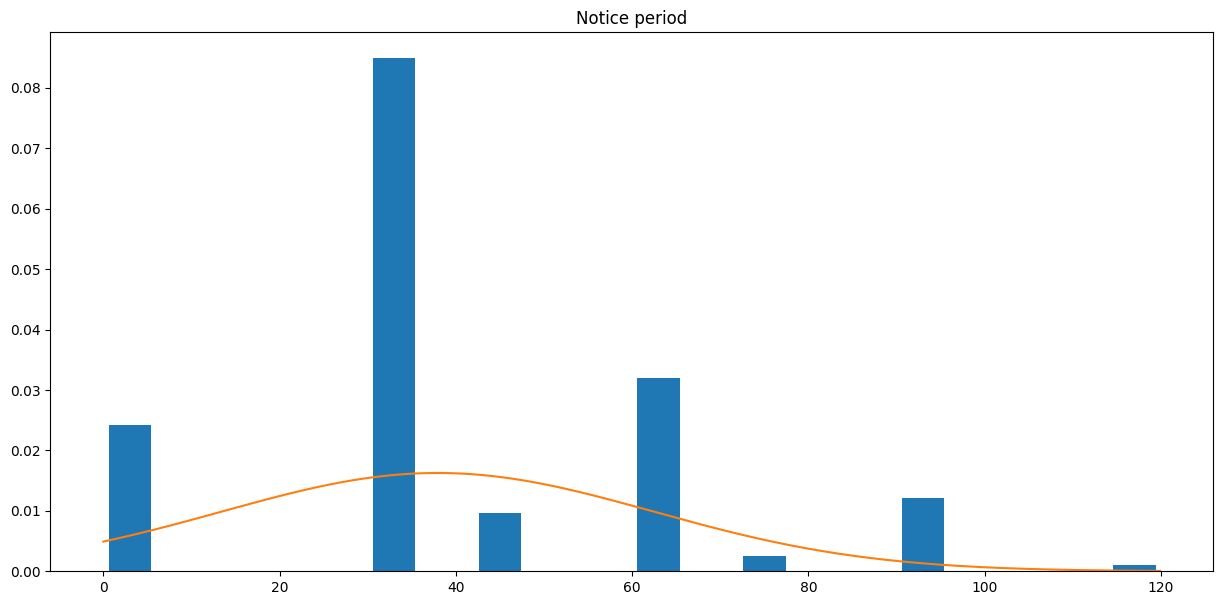

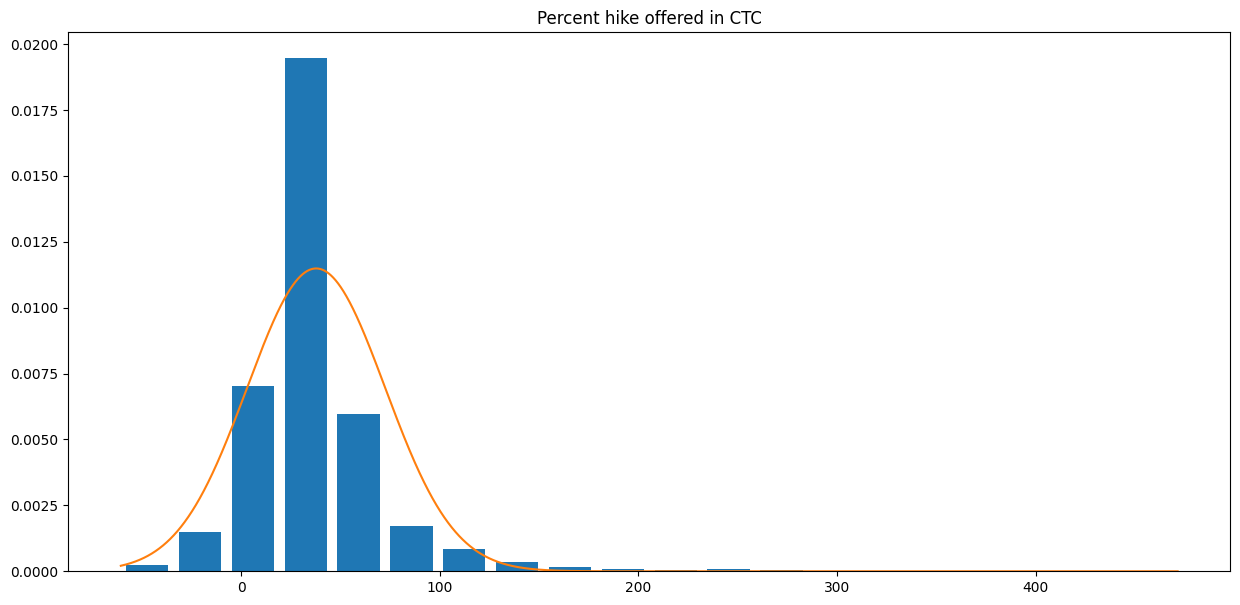

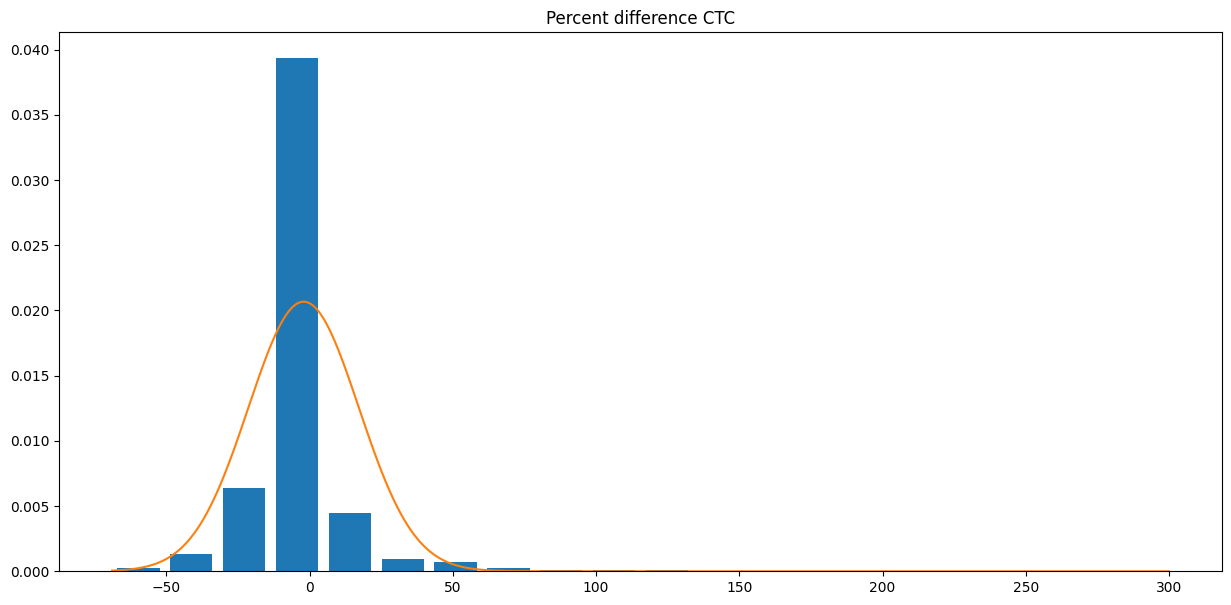

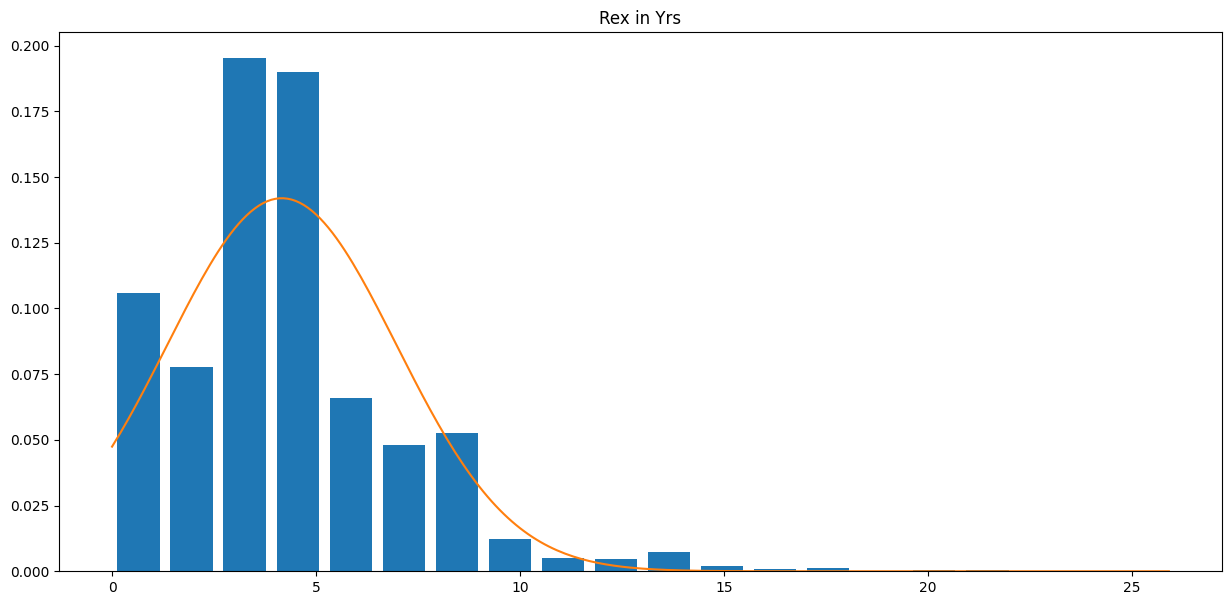

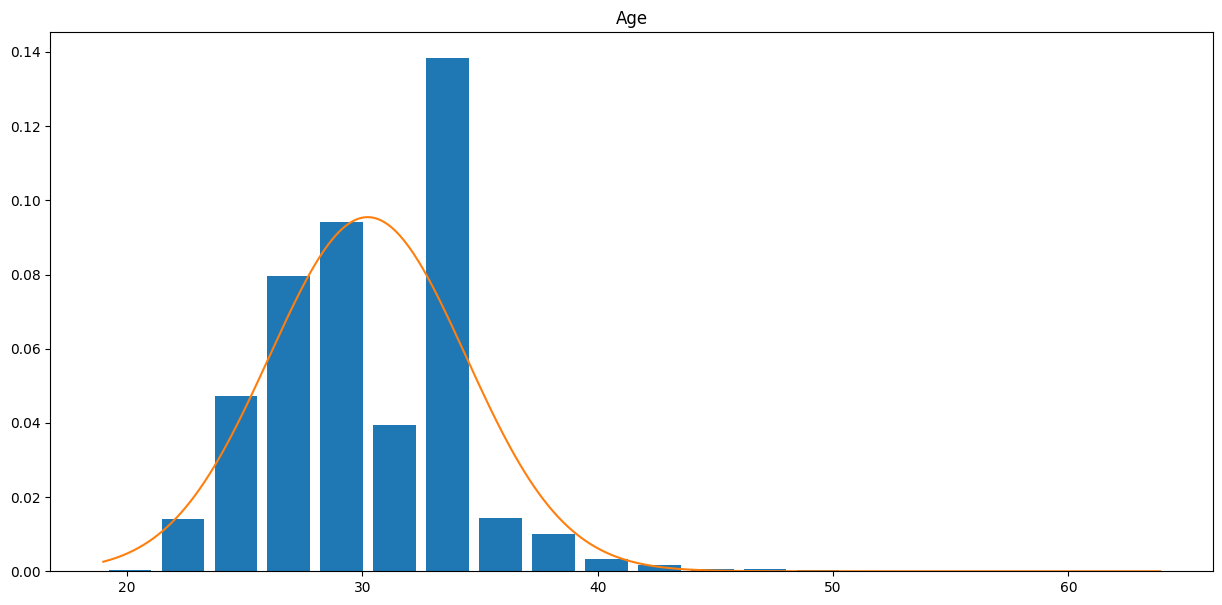

In [12]:
from scipy.stats import norm
import numpy as np
plt_column = ['Duration to accept offer','Notice period',
       'Percent hike offered in CTC', 'Percent difference CTC','Rex in Yrs','Age']
for i in plt_column:
    plt.subplots(figsize = (15,7))
    plt.hist(df[i], bins=20, rwidth=0.8, density=True)
    rng = np.arange(df[i].min(),df[i].max(),0.1)
    plt.plot(rng, norm.pdf(rng,df[i].mean(),df[i].std()))
    plt.title(i);

# i use standard deviation method to remove outlier because i gets best accuracy from it


In [13]:
# removing outliers by standard deviation method
for i in plt_column:
    upper_limit_expected = df[i].mean() + 3*df[i].std()
    lower_limit_expected = df[i].mean() -3*df[i].std()
    df=df[df[i]<upper_limit_expected]
    df=df[df[i]>lower_limit_expected]

In [14]:
df.shape 

(11279, 17)

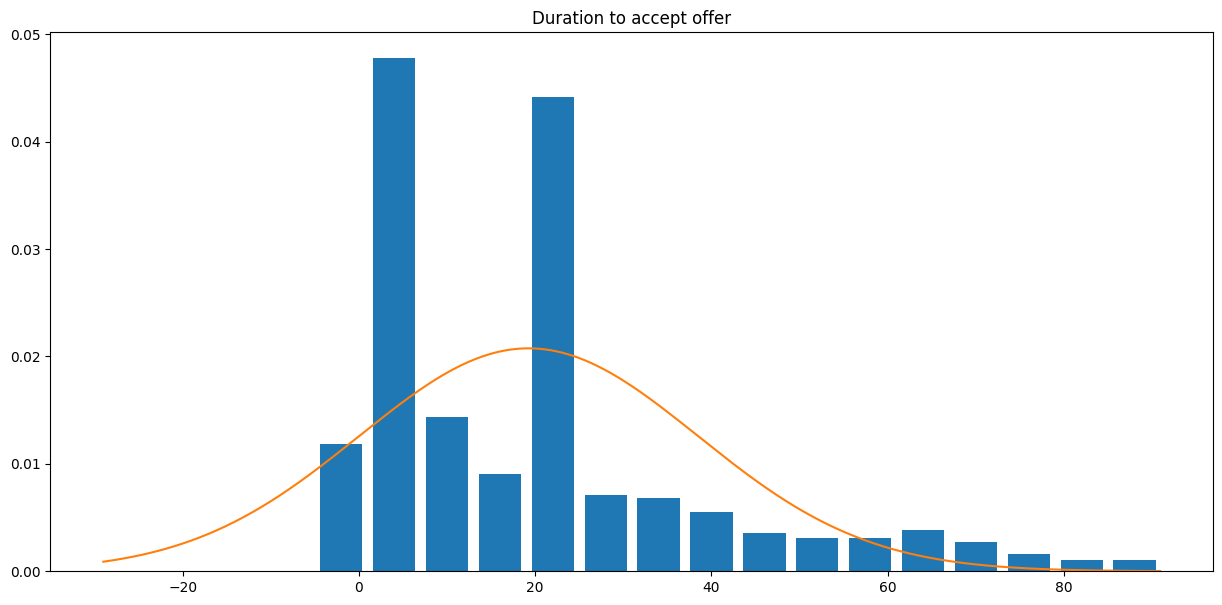

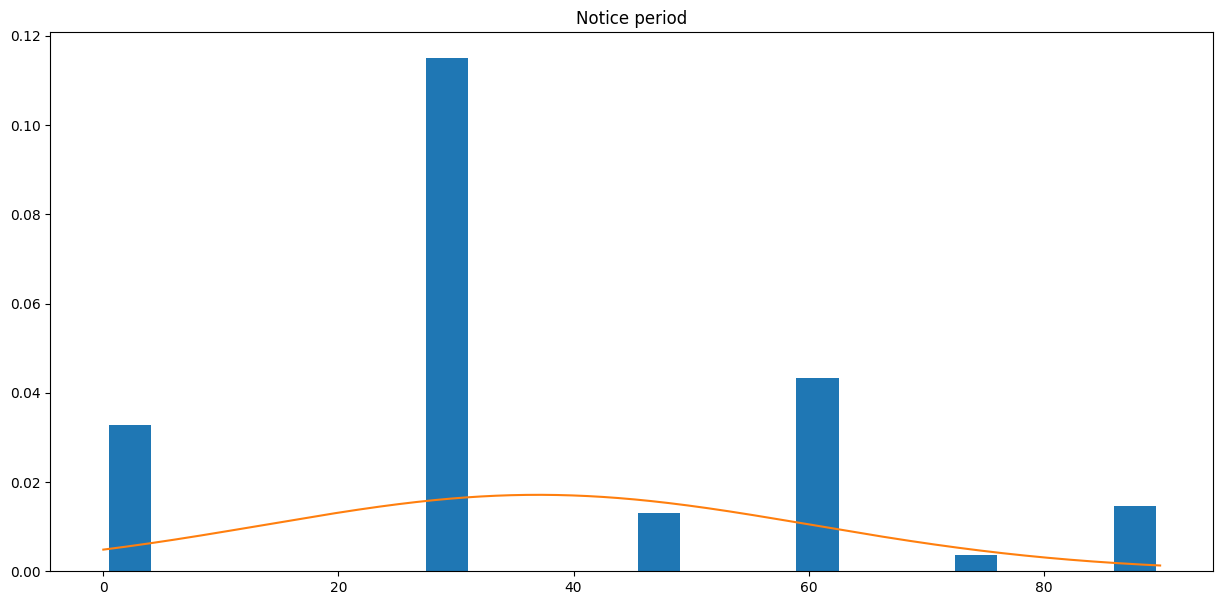

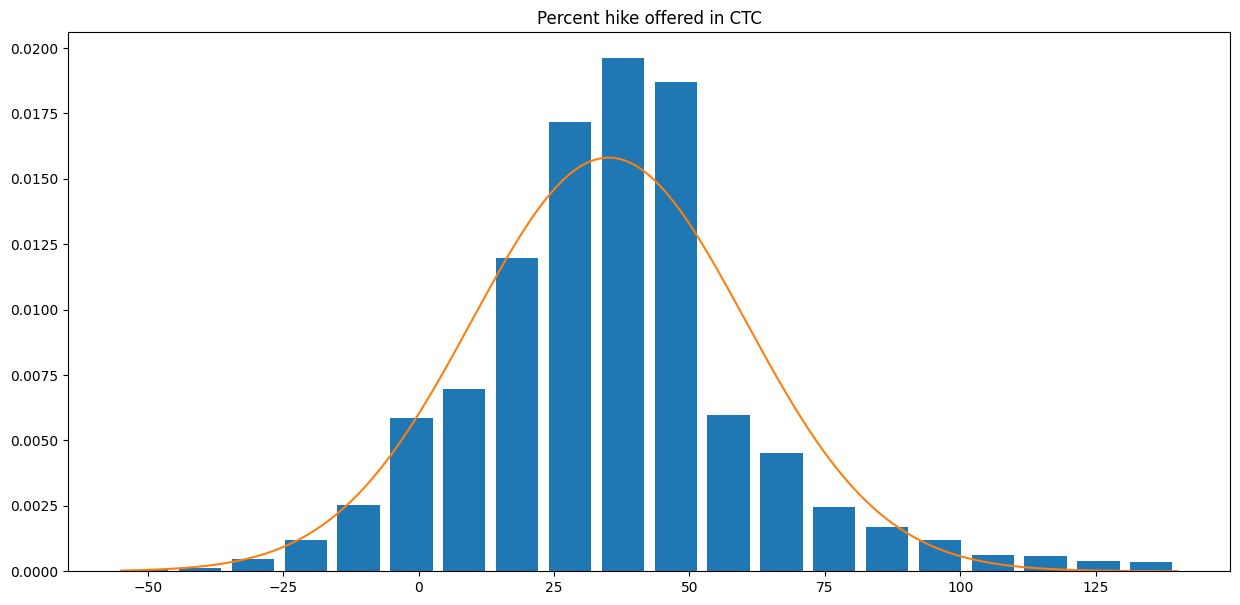

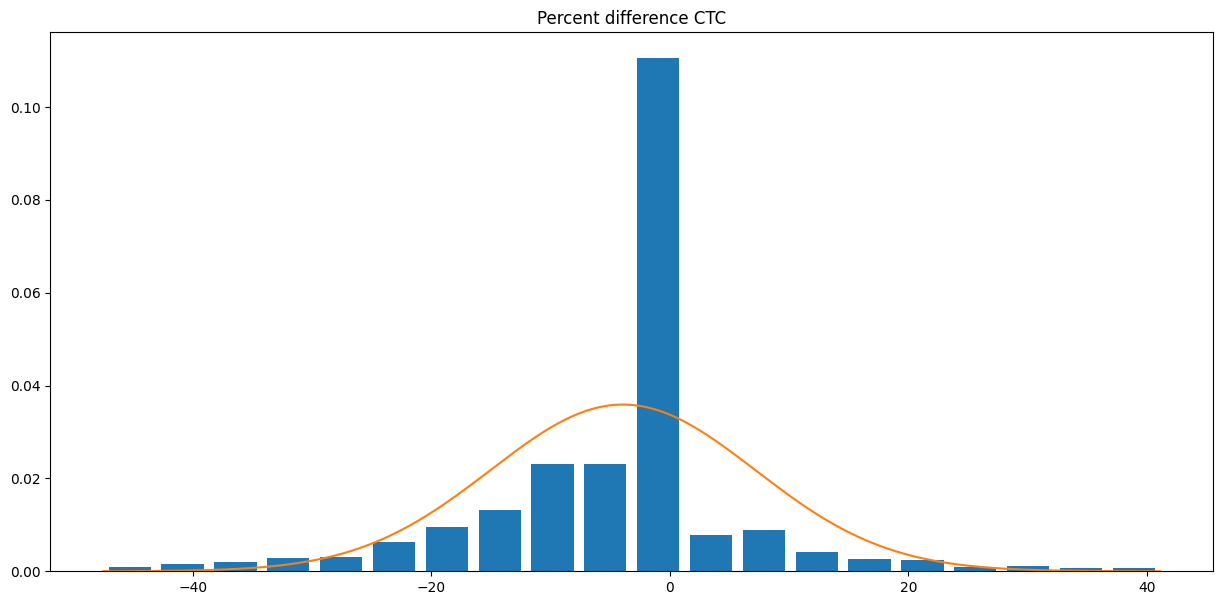

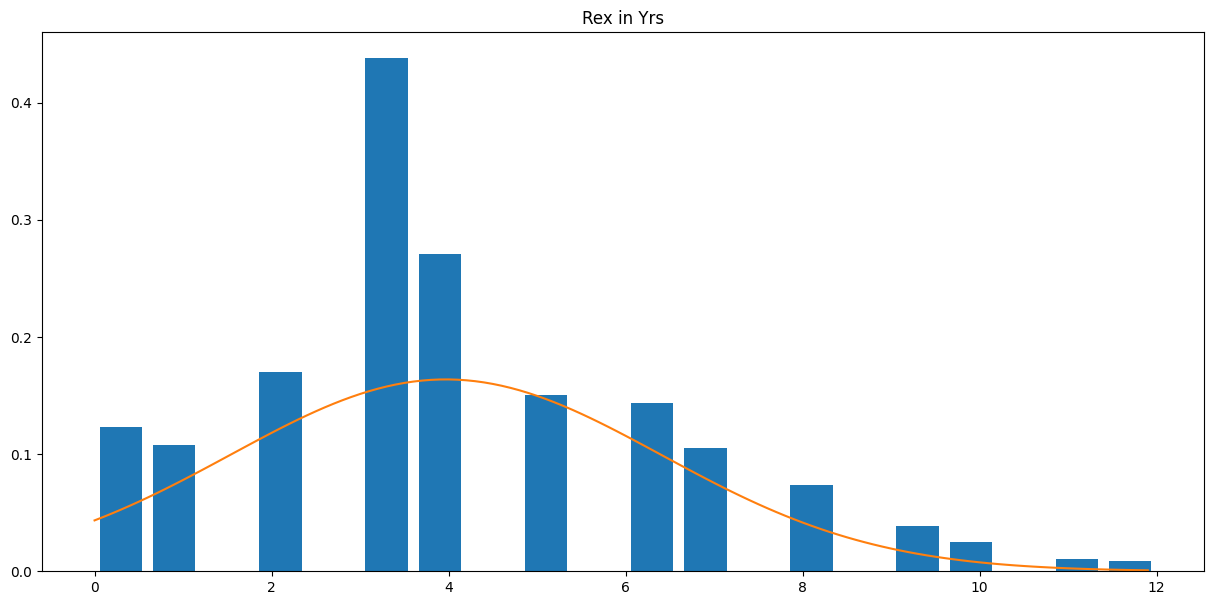

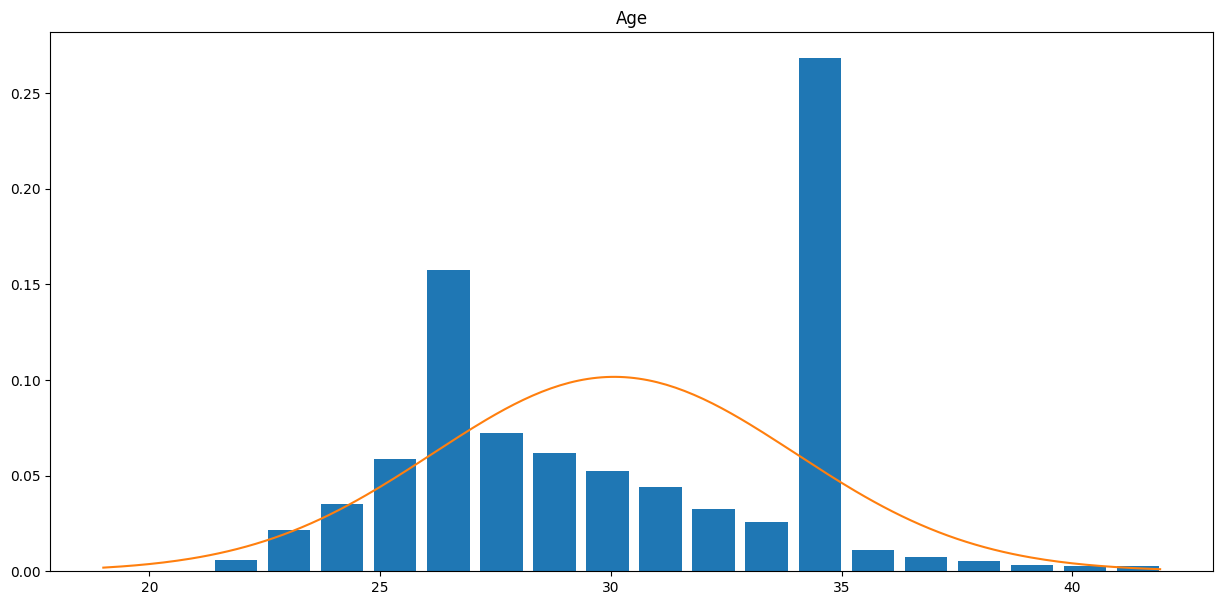

In [15]:
from scipy.stats import norm
import numpy as np
plt_column = ['Duration to accept offer','Notice period',
       'Percent hike offered in CTC', 'Percent difference CTC','Rex in Yrs','Age']
for i in plt_column:
    plt.subplots(figsize = (15,7))
    plt.hist(df[i], bins=20, rwidth=0.8, density=True)
    rng = np.arange(df[i].min(),df[i].max(),0.1)
    plt.plot(rng, norm.pdf(rng,df[i].mean(),df[i].std()))
    plt.title(i);

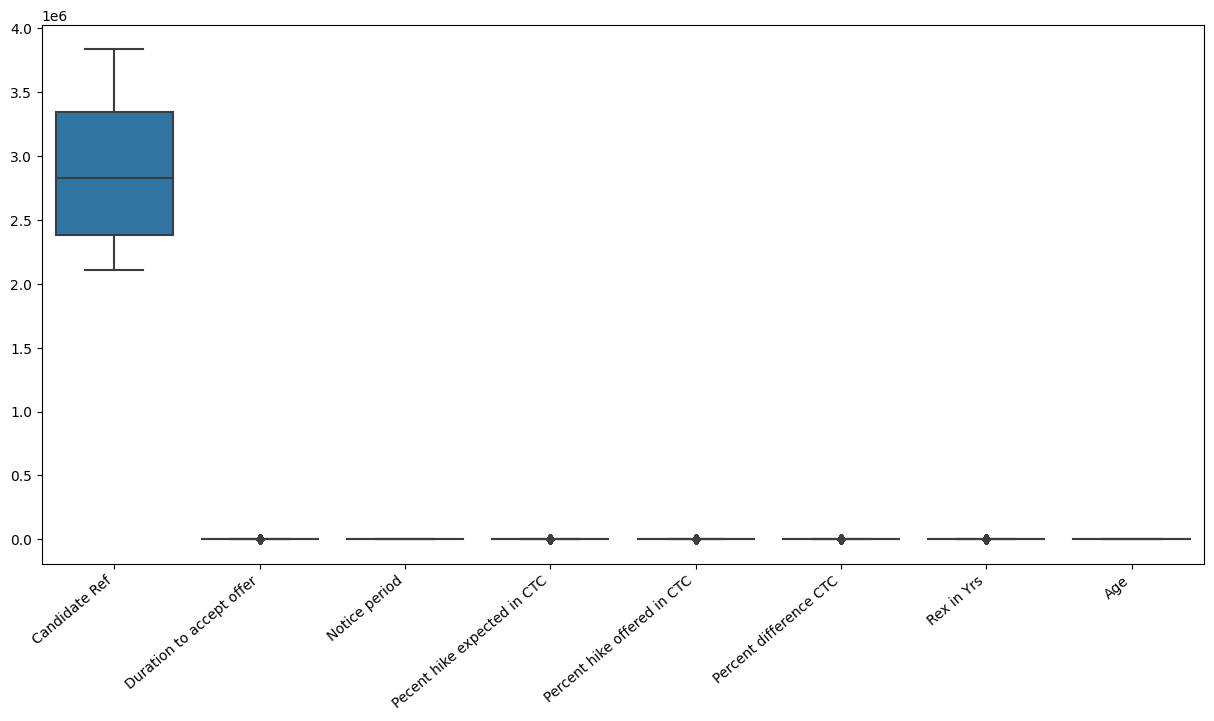

In [16]:
plt.figure(figsize = (15,7))
ax = sns.boxplot(data = df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 40, ha ='right')
plt.show()

In [17]:
df['Status'].replace(to_replace = ['Joined', 'Not Joined'], value = (1,0), inplace = True)

# Machine Learning Part

In [18]:
tgt_temp=df.Status.value_counts()
print(tgt_temp)
print("PERCENTAGE OF CDT WHO HAVE NOT JOINED: "+str(round(tgt_temp[0]*100/11142,2)))
print("PERCENTAGE OF CDT WHO HAVE JOINED: "+str(round(tgt_temp[1]*100/11142,2)))

1    8034
0    3245
Name: Status, dtype: int64
PERCENTAGE OF CDT WHO HAVE NOT JOINED: 29.12
PERCENTAGE OF CDT WHO HAVE JOINED: 72.11


In [19]:
# coverting catagorical data to numerical
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
catagorical = ['Offered band','Gender','Candidate Source','LOB','Location','DOJ Extended','Joining Bonus','Candidate relocate actual']
for i in catagorical:
    df[i]=le.fit_transform(df[i])

In [20]:
x = df.drop(columns=['Status'])
y = df['Status']

In [21]:
from sklearn.model_selection import train_test_split
  
# split into 70:30 ration
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
  
# describes info about train and test set
print("Number rows X_train dataset: ", x_train.shape)
print("Number rows y_train dataset: ", y_train.shape)
print("Number rows X_test dataset: ", x_test.shape)
print("Number rows y_test dataset: ", y_test.shape)

Number rows X_train dataset:  (7895, 16)
Number rows y_train dataset:  (7895,)
Number rows X_test dataset:  (3384, 16)
Number rows y_test dataset:  (3384,)


In [22]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 5630
Before OverSampling, counts of label '0': 2265 

After OverSampling, the shape of train_X: (11260, 16)
After OverSampling, the shape of train_y: (11260,) 

After OverSampling, counts of label '1': 5630
After OverSampling, counts of label '0': 5630


# Accuracy Testing On DecisionTree

In [23]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)

from sklearn.metrics import accuracy_score
score_dtc = round(accuracy_score(y_pred,y_test)*100,2)

print('the accuracy score achieved using DecisionTreeClassifier is: ' + str(score_dtc)+'%')

the accuracy score achieved using DecisionTreeClassifier is: 77.25%


In [24]:
# with OverSampling data 
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train_res,y_train_res)
y_pred=dtc.predict(x_test)

from sklearn.metrics import accuracy_score
score_dtc = round(accuracy_score(y_pred,y_test)*100,2)

print('the accuracy score achieved using DecisionTreeClassifier is: ' + str(score_dtc)+'%')

the accuracy score achieved using DecisionTreeClassifier is: 75.98%


# Accuracy Testing On RandomForest

In [25]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test) 

from sklearn.metrics import accuracy_score
score_clf = round(accuracy_score(y_pred,y_test)*100,2)

print('the accuracy score achieved using RandomForestClassifier is: '+str(score_clf)+'%')


the accuracy score achieved using RandomForestClassifier is: 84.52%


In [26]:
# with OverSampling data 
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(x_train_res,y_train_res)
y_pred=clf.predict(x_test) 

from sklearn.metrics import accuracy_score
score_clf = round(accuracy_score(y_pred,y_test)*100,2)

print('the accuracy score achieved using RandomForestClassifier is: ' + str(score_clf)+'%')


the accuracy score achieved using RandomForestClassifier is: 81.62%


# Accuracy Testing On Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
score_lr = round(accuracy_score(y_pred,y_test)*100,2)

print('the accuracy score achieved using RandomForestClassifier is: ' + str(score_lr)+'%')

the accuracy score achieved using RandomForestClassifier is: 71.04%


In [28]:
# with OverSampling data 
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train_res,y_train_res)
y_pred=lr.predict(x_test)
score_lr = round(accuracy_score(y_pred,y_test)*100,2)

print('the accuracy score achieved using RandomForestClassifier is: ' + str(score_lr)+'%')

the accuracy score achieved using RandomForestClassifier is: 71.04%
